<a href="https://colab.research.google.com/github/TGJAISAI/EDA/blob/main/Police_Killings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 

In [31]:
import plotly as py
import cufflinks as cf
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

**Police Killings**

This directory contains the data behind the story Where Police Have Killed Americans In 2015.

We linked entries from the Guardian's database on police killings to census data from the American Community Survey. The Guardian data was downloaded on June 2, 2015. More information about its database is available here.

Census data was calculated at the tract level from the 2015 5-year American Community Survey using the tables S0601 (demographics), S1901 (tract-level income and poverty), S1701 (employment and education) and DP03 (county-level income). Census tracts were determined by geocoding addresses to latitude/longitude using the Bing Maps and Google Maps APIs and then overlaying points onto 2014 census tracts. GEOIDs are census-standard and should be easily joinable to other ACS tables -- let us know if you find anything interesting.

Field descriptions:


Header | Description | Source
---|-----------|----
`name` | Name of deceased | Guardian
`age` | Age of deceased | Guardian
`gender` | Gender of deceased | Guardian
`raceethnicity` | Race/ethnicity of deceased | Guardian
`month` | Month of killing | Guardian
`day` | Day of incident | Guardian
`year` | Year of incident | Guardian
`streetaddress` | Address/intersection where incident occurred | Guardian
`city` | City where incident occurred | Guardian
`state` | State where incident occurred | Guardian
`latitude` | Latitude, geocoded from address | 
`longitude` | Longitude, geocoded from address | 
`state_fp` | State FIPS code | Census
`county_fp` | County FIPS code | Census
`tract_ce` | Tract ID code | Census
`geo_id` | Combined tract ID code | 
`county_id` | Combined county ID code | 
`namelsad` | Tract description | Census
`lawenforcementagency` | Agency involved in incident | Guardian
`cause` | Cause of death | Guardian
`armed` | How/whether deceased was armed | Guardian
`pop` | Tract population | Census
`share_white` | Share of pop that is non-Hispanic white | Census
`share_bloack` | Share of pop that is black (alone, not in combination) | Census
`share_hispanic` | Share of pop that is Hispanic/Latino (any race) | Census
`p_income` | Tract-level median personal income | Census
`h_income` | Tract-level median household income | Census
`county_income` | County-level median household income | Census
`comp_income` | `h_income` / `county_income` | Calculated from Census 
`county_bucket` | Household income, quintile within county | Calculated from Census
`nat_bucket` | Household income, quintile nationally | Calculated from Census
`pov` | Tract-level poverty rate (official) | Census
`urate` | Tract-level unemployment rate | Calculated from Census
`college` | Share of 25+ pop with BA or higher | Calculated from Census

In [32]:
df=pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/police-killings/police_killings.csv",encoding='latin-1')

pd.options.display.max_columns = None
pd.options.display.max_rows = None
df.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,latitude,longitude,state_fp,county_fp,tract_ce,geo_id,county_id,namelsad,lawenforcementagency,cause,armed,pop,share_white,share_black,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,32.529577,-86.362829,1,51,30902,1051030902,1051,Census Tract 309.02,Millbrook Police Department,Gunshot,No,3779,60.5,30.5,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,31.321739,-92.434860,22,79,11700,22079011700,22079,Census Tract 117,Rapides Parish Sheriff's Office,Gunshot,No,2769,53.8,36.2,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,42.583560,-87.835710,55,59,1200,55059001200,55059,Census Tract 12,Kenosha Police Department,Gunshot,No,4079,73.8,7.7,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,33.939298,-118.219463,6,37,535607,6037535607,6037,Census Tract 5356.07,South Gate Police Department,Gunshot,Firearm,4343,1.2,0.6,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,41.148575,-81.429878,39,153,530800,39153530800,39153,Census Tract 5308,Kent Police Department,Gunshot,No,6809,92.5,1.4,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  467 non-null    object 
 1   age                   467 non-null    object 
 2   gender                467 non-null    object 
 3   raceethnicity         467 non-null    object 
 4   month                 467 non-null    object 
 5   day                   467 non-null    int64  
 6   year                  467 non-null    int64  
 7   streetaddress         463 non-null    object 
 8   city                  467 non-null    object 
 9   state                 467 non-null    object 
 10  latitude              467 non-null    float64
 11  longitude             467 non-null    float64
 12  state_fp              467 non-null    int64  
 13  county_fp             467 non-null    int64  
 14  tract_ce              467 non-null    int64  
 15  geo_id                4

In [34]:
df.shape

(467, 34)

In [35]:
df.duplicated().sum()

0

In [36]:
df.count()

name                    467
age                     467
gender                  467
raceethnicity           467
month                   467
day                     467
year                    467
streetaddress           463
city                    467
state                   467
latitude                467
longitude               467
state_fp                467
county_fp               467
tract_ce                467
geo_id                  467
county_id               467
namelsad                467
lawenforcementagency    467
cause                   467
armed                   467
pop                     467
share_white             467
share_black             467
share_hispanic          467
p_income                467
h_income                465
county_income           467
comp_income             465
county_bucket           440
nat_bucket              465
pov                     467
urate                   465
college                 465
dtype: int64

**showing total number of missing values in the dataset☹️**

In [37]:
df.isna().sum().sum()

41

**fill the nan vaues with mean**👌

In [38]:
df.fillna(df.mean(),inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



**Separating numerical and string columns🤩**

In [39]:
num = list(df.select_dtypes(include = np.number).columns)
cat = list(df.select_dtypes(include = 'object').columns)

In [40]:
num = list(df.select_dtypes(include=np.number).columns)
cat =  list(df.select_dtypes(include="object").columns)

pd.DataFrame(cat)

,0
0,name
1,age
2,gender
3,raceethnicity
4,month
5,streetaddress
6,city
7,state
8,namelsad
9,lawenforcementagency


In [41]:
num1=pd.DataFrame(num)

In [42]:
cm = sns.light_palette("red", as_cmap=True)
a=df.describe()
a.style.background_gradient(cmap=cm)

,day,year,latitude,longitude,state_fp,county_fp,tract_ce,geo_id,county_id,pop,h_income,county_income,comp_income,county_bucket,nat_bucket,urate,college
count,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,15.830835,2015.000000,36.403224,-96.972666,25.342612,91.584582,236936.614561,25434433938.755890,25434.197002,4783.719486,46627.182796,52527.331906,0.895913,2.497727,2.496774,0.117399,0.220217
std,8.658970,0.000000,5.193357,16.953842,16.766458,110.185129,341262.721715,16801397971.475952,16801.379755,2374.565749,20467.132139,12948.263811,0.332867,1.352154,1.295623,0.069027,0.158007
min,1.000000,2015.000000,19.915194,-159.642700,1.000000,1.000000,100.000000,1003010300.000000,1003.000000,0.000000,10290.000000,22545.000000,0.184049,1.000000,1.000000,0.011335,0.013547
25%,8.000000,2015.000000,33.335240,-111.954636,8.000000,29.000000,5201.500000,8022008307.000000,8022.000000,3357.500000,32632.000000,43804.000000,0.646140,1.000000,1.000000,0.068683,0.106446
50%,16.000000,2015.000000,35.769779,-94.761902,24.000000,63.000000,40200.000000,24033803524.000000,24033.000000,4447.000000,42782.000000,50856.000000,0.870749,2.000000,2.000000,0.105769,0.169804
75%,23.000000,2015.000000,39.937452,-82.961582,40.000000,111.000000,378450.000000,40112470302.500000,40112.000000,5815.500000,56127.500000,56832.000000,1.079962,3.000000,3.000000,0.140787,0.284102
max,31.000000,2015.000000,61.218408,-68.100007,56.000000,740.000000,980000.000000,56005000700.000000,56005.000000,26826.000000,142500.000000,110292.000000,2.865216,5.000000,5.000000,0.507614,0.828070


**THERE IS WRONG DATA IN THE AGE SOO LETS FIND IT AND LETS DROP💁🏽**

In [43]:
for x in df.index:
  if df.loc[x, "age"] == 'Unknown':
    df.drop(x, inplace = True)

**NOW LETS CONVERT AGE WHICH IS IN OBJECT WE MAKE IT AS INT64👌🏻**

In [44]:
df['age']=pd.to_numeric(df['age'])

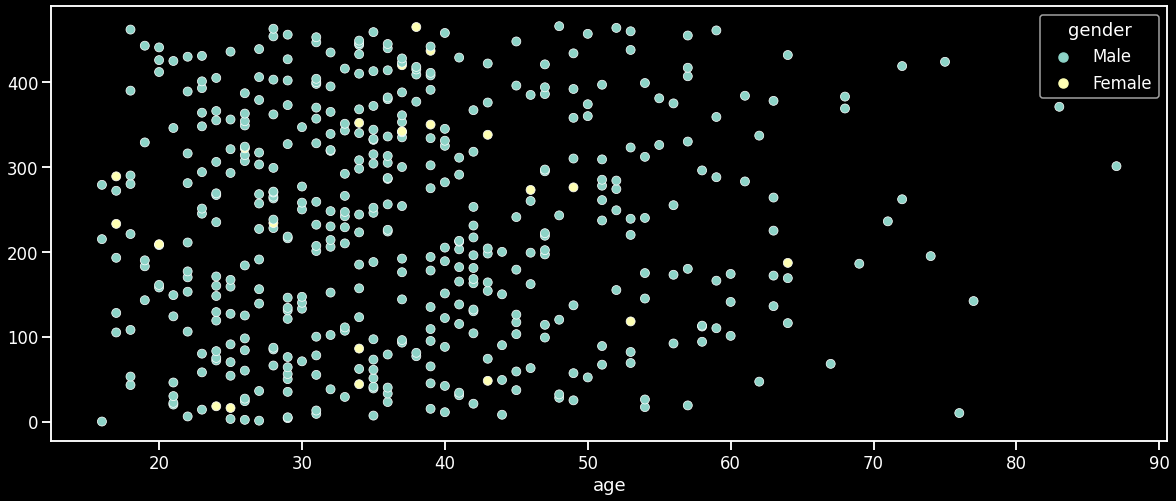

In [45]:
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
plt.figure(figsize=(20,8))
g=sns.scatterplot(x=df['age'].sort_values(),y=df.index,hue=df["gender"])

In [46]:
print('Total number of minor killed :', df[df['age'] < 18].shape[0])
print('Total number of adults killed  :', df[df['age'] < 60].shape[0])
print('Number of senior citizens killed after the age of 65 is:',df[df['age'] > 65].shape[0])

Total number of minor killed : 9
Total number of adults killed  : 434
Number of senior citizens killed after the age of 65 is: 13


**the police has killed most of them fromn the age groupe of 20 to 60 **😣


**2.lets get to know the killed ration of male and female ?😱 **


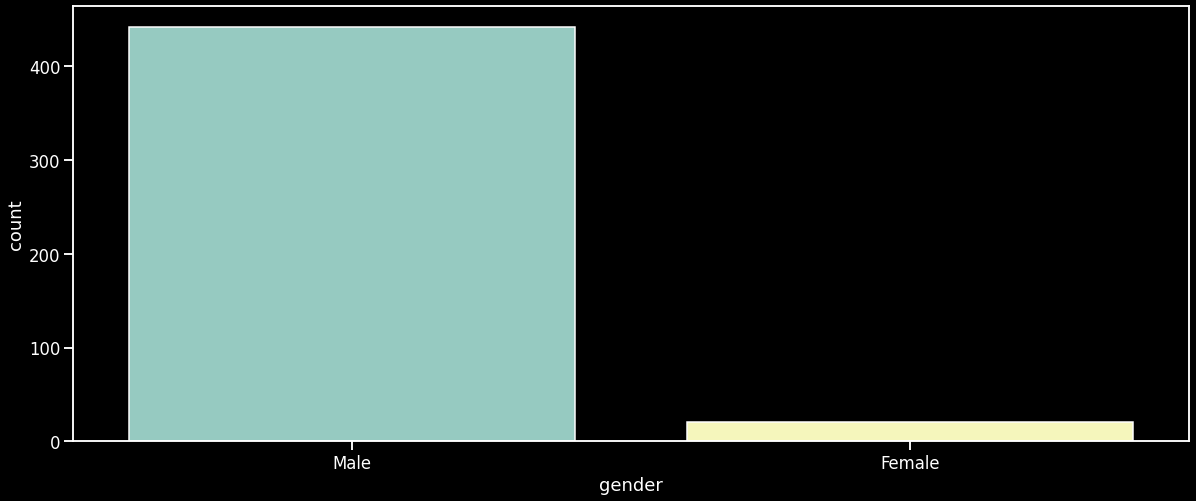

In [47]:
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
plt.figure(figsize=(20,8))
ax = sns.countplot(x="gender", data=df)

In [48]:
a=df['raceethnicity'].value_counts()
pd.DataFrame(a)

,raceethnicity
White,235
Black,135
Hispanic/Latino,66
Unknown,13
Asian/Pacific Islander,10
Native American,4


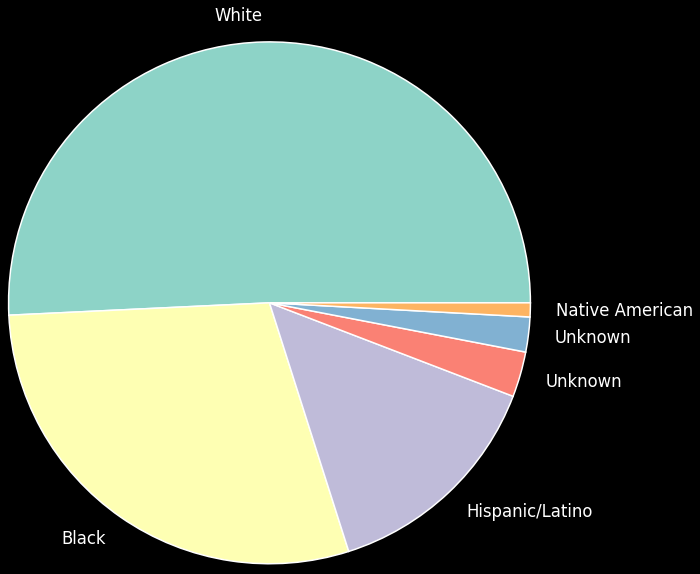

In [49]:
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
plt.pie(df['raceethnicity'].value_counts(),radius=3,labels=["White",'Black','Hispanic/Latino','Unknown','Unknown','Native American'])
plt.show()

IN which month the most of the killing is happend ?😱

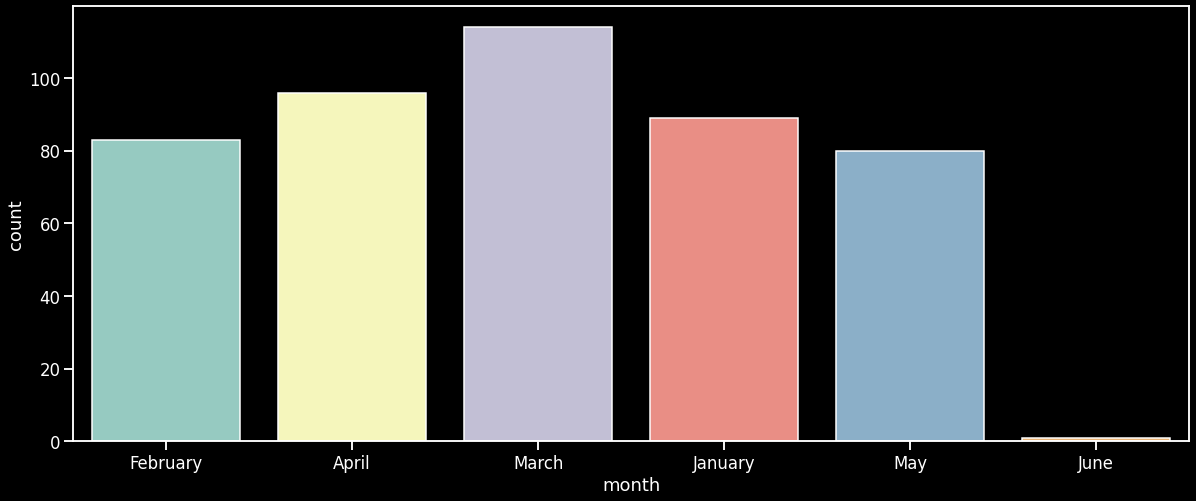

In [50]:
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
plt.figure(figsize=(20,8))
ax = sns.countplot(x="month", data=df)

**TOP 5 CITY WHERE THE POLICE HAVE KILLED MORE PUBLIC **

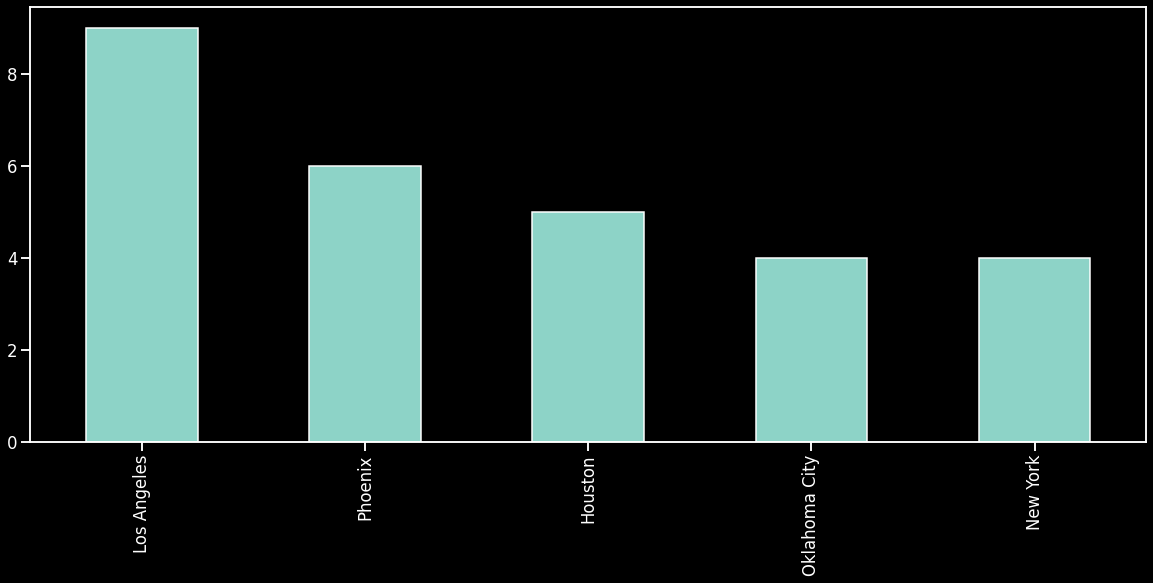

In [51]:
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
plt.figure(figsize=(20,8))
df['city'].value_counts()[:5].plot(kind="bar")

**which department has made hights number of killes ?**

<Figure size 1440x576 with 0 Axes>

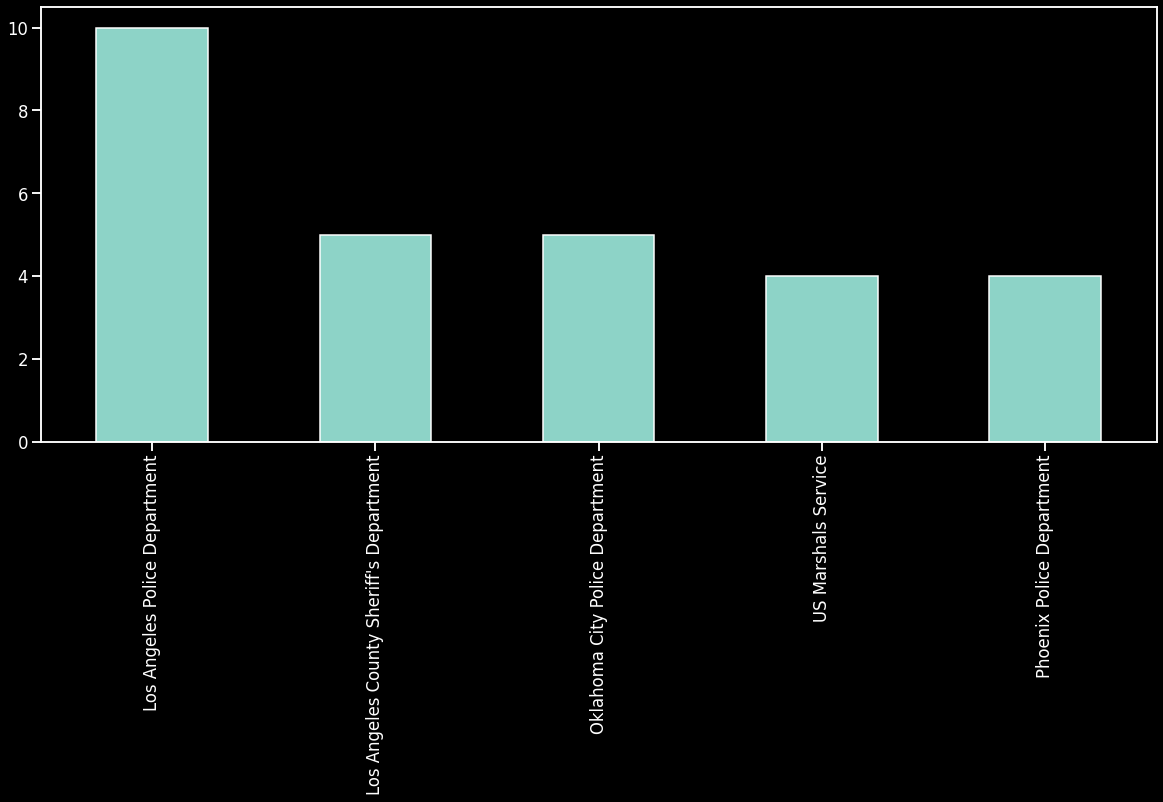

In [52]:
#lawenforcementagency
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
plt.figure(figsize=(20,8))
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
plt.figure(figsize=(20,8))
df['lawenforcementagency'].value_counts()[:5].plot(kind="bar")

In [53]:
a=df['cause'].value_counts()
pd.DataFrame(a)

,cause
Gunshot,407
Taser,27
Death in custody,14
Struck by vehicle,12
Unknown,3


**lets find out the cause of death of public ?**

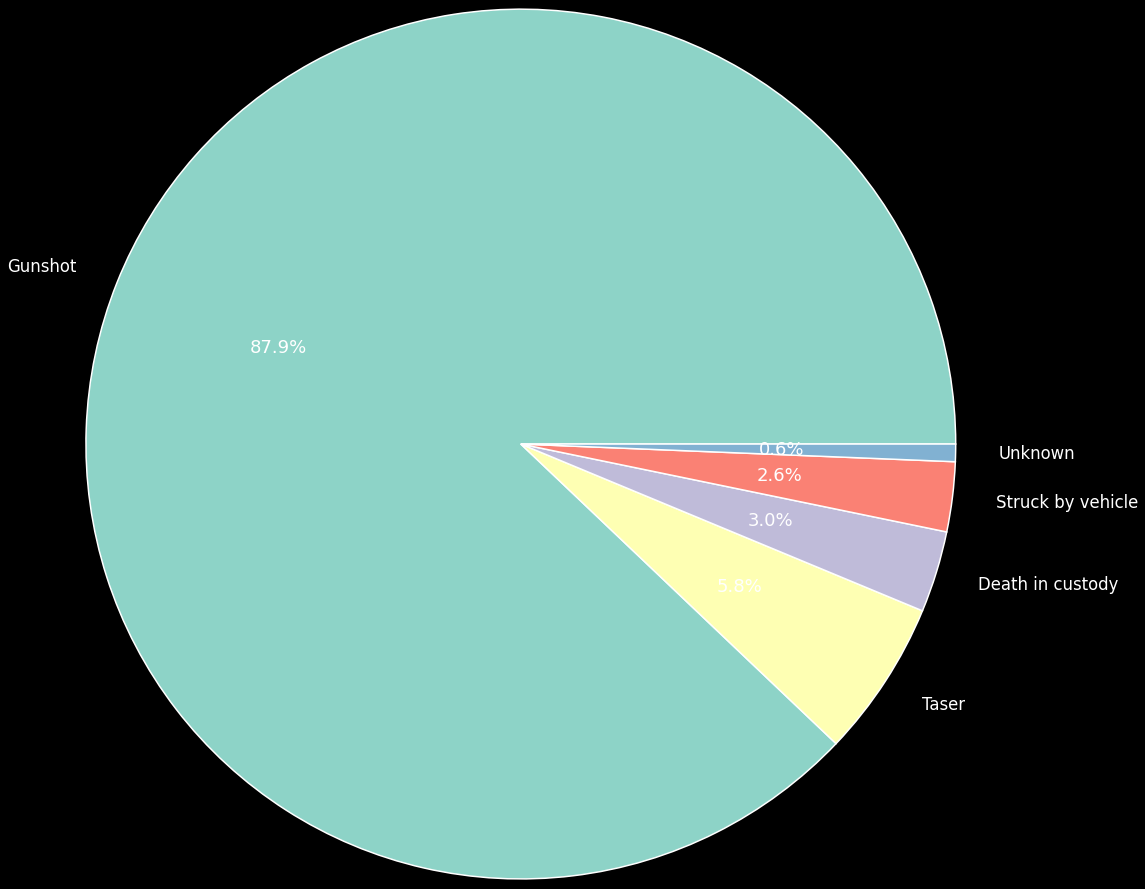

In [59]:
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
plt.pie(df['cause'].value_counts(),radius=5,autopct='%1.1f%%',labels=['Gunshot','Taser','Death in custody','Struck by vehicle','Unknown'])
plt.show()

In [55]:
#armed
#How/whether deceased was armed
a=df['armed'].value_counts()
pd.DataFrame(a)

,armed
Firearm,229
No,101
Knife,67
Other,25
Vehicle,18
Non-lethal firearm,14
Unknown,7
Disputed,2


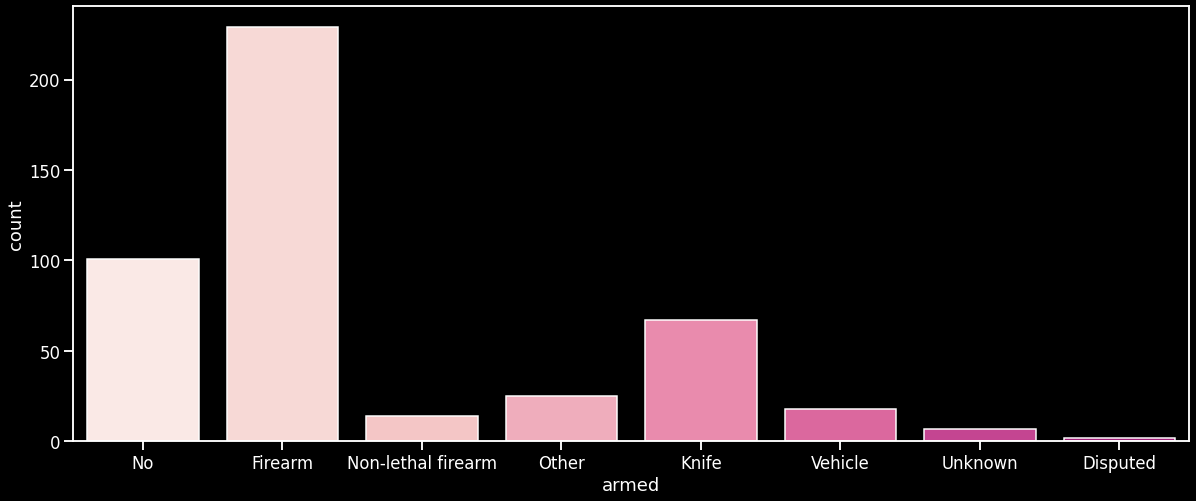

In [56]:
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
plt.figure(figsize=(20,8))
sns.set_palette("RdPu", 10)
ax = sns.countplot(x="armed", data=df)

lets make a heat map ?

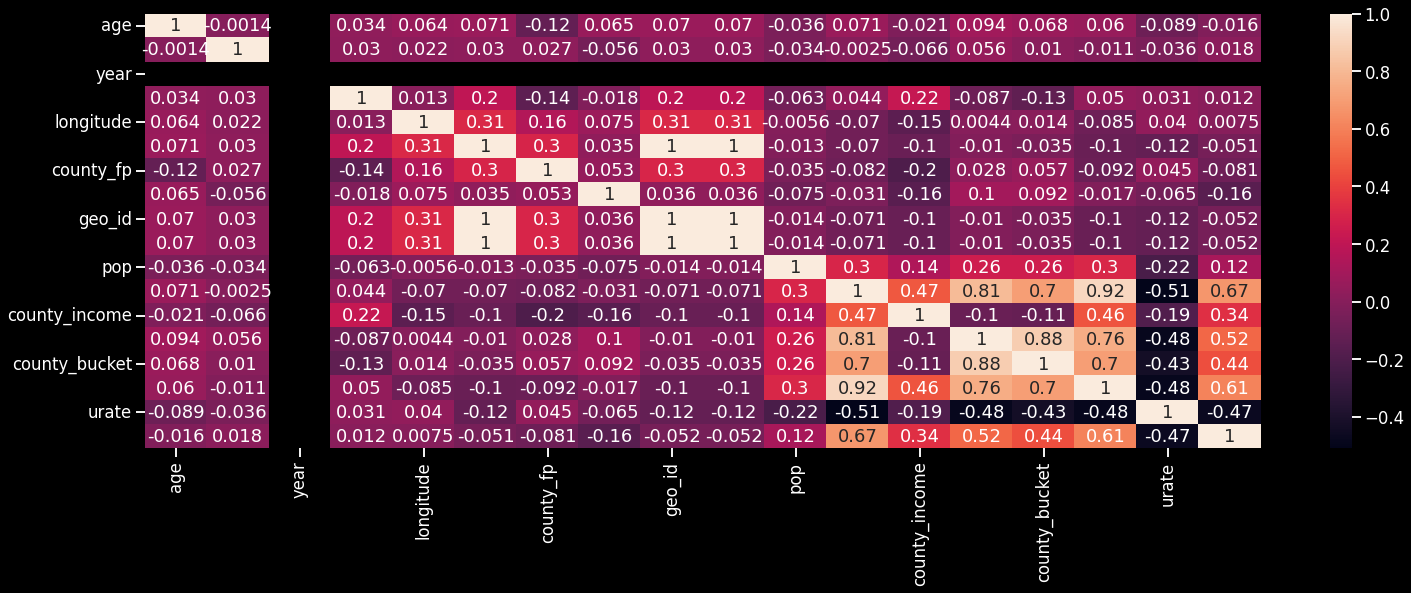

In [57]:
sns.heatmap(df.select_dtypes(['float64' , 'int64']).corr(),annot=True)
plt.gcf().set_size_inches(25, 8)
plt.show()

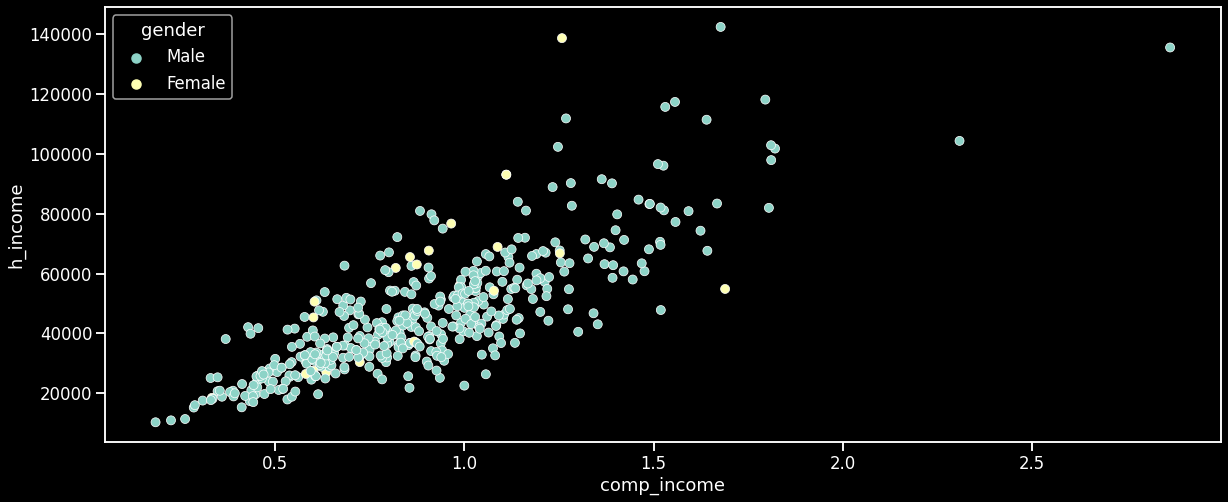

In [58]:
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
plt.figure(figsize=(20,8))
g=sns.scatterplot(x=df['comp_income'],y=df['h_income'],hue=df["gender"])

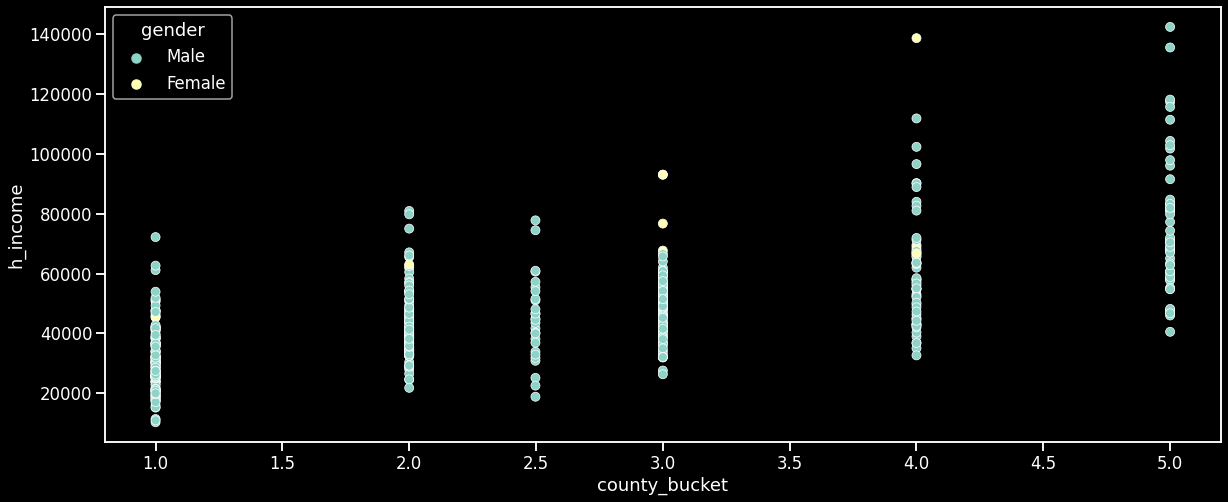

In [60]:
#county_bucket
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
plt.figure(figsize=(20,8))
g=sns.scatterplot(x=df['county_bucket'],y=df['h_income'],hue=df["gender"])